In [4]:
try:
    import google.colab
    from google.colab import output
    output.enable_custom_widget_manager()
    !pip install invertedai_drive
except:
    pass
%matplotlib widget
from invertedai_drive import drive
import numpy as np
import cv2
from IPython.display import clear_output
clear_output()

jupyter_render(children=(HBox(children=(Play(value=0, description='Press play', max=0), IntSlider(value=0, des…

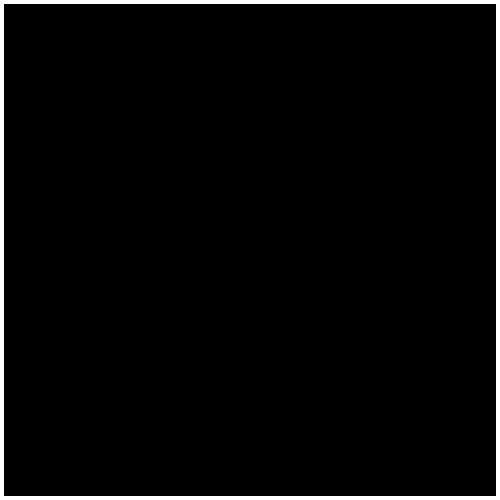

In [5]:
config = drive.config(
    api_key="",
    location="",
    agent_count=10,
    batch_size=1,
    obs_length=1,
    step_times=1,
    min_speed=10,
    max_speed=20,
)
simulation_lenght = 50
renderer = drive.jupyter_render()
display(renderer)

In [6]:
response = drive.initialize(config)
agent_attributes = response["attributes"]
frames = []
for t in range(simulation_lenght):
    response = drive.run(
        config=config,
        location=config.location,
        agent_attributes=agent_attributes,
        states=response["states"],
        recurrent_states=response["recurrent_states"],
        return_birdviews=True,
    )
    birdview = cv2.imdecode(np.array(response["bird_view"], dtype=np.uint8), cv2.IMREAD_COLOR)
    renderer.add_frame(birdview)